<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/neuro/NeuroIA/mypersonality.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
    <div align="center"> Recordá abrir en una nueva pestaña </div>

# MyPersonality

La prueba Big5 (Costa y Mac Crae 1985, Goldberg et al. 2006) es una taxonomía o clasificación de rasgos de personalidad que analiza la composición de cinco dimensiones de personalidad en su sentido más amplio. Esta disertación se publicó en el Psychological Review, 41, 1-32. Los cinco factores son:

- Apertura a la experiencia (inventivo / curioso vs. consistente / cauteloso) O  
- Escrupulosidad (eficiente / organizado vs. extravagante / descuidado) C  
- Extraversión (sociable / enérgico vs. solitario / reservado) E  
- Amabilidad (amigable / compasivo vs. desafiante / insensible) A  
- Neuroticismo (susceptible / nervioso vs. resistente / seguro) N

In [ ]:
import pandas as pd
import plotly.express as px
from scipy.stats import pearsonr
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('https://unket.s3-sa-east-1.amazonaws.com/data/mypersonality.csv')

In [ ]:
df['sEXT']

0       2.65
1       2.65
2       2.65
3       2.65
4       2.65
        ... 
9912    2.15
9913    4.05
9914    4.05
9915    1.40
9916    4.25
Name: sEXT, Length: 9917, dtype: float64

In [ ]:
df = df.drop_duplicates(subset='#AUTHID')

In [ ]:
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,06/19/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.10
102,318bf822d4f2bd3920367560218619c0,has bed bugs..... ewwwww!,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,06/27/09 11:21 PM,318.0,49024.8,97.88,0.02,49584.0,0.49,0.06
171,ecbddbfe00e0f83cfdb802a7186061c7,"is stuck on Band-Aid brand, cuz Band-Aid's stu...",4.30,2.15,3.60,3.30,4.10,y,n,y,n,y,06/28/09 05:03 AM,739.0,267574.0,98.39,0.01,270029.0,0.50,0.07
236,db39f7b2aad360b1033ec1f8fcd57f9c,Back from vacation and tired,4.65,3.20,3.05,3.65,4.75,y,y,n,y,y,07/15/09 10:59 PM,102.0,4359.8,86.33,0.09,4668.0,0.46,0.36
246,4d035bd3fd8d9595d15cea9e388964be,had a great day at church...,3.70,2.90,3.40,3.35,4.05,y,y,n,n,y,07/19/09 05:40 PM,57.0,1509.5,98.02,0.05,1522.0,0.49,0.03


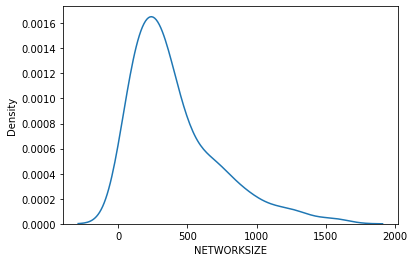

In [ ]:
sns.kdeplot(df['NETWORKSIZE']);

In [ ]:
np.median(df['NETWORKSIZE'])

315.0

In [ ]:
rho, p = pearsonr(df['sEXT'], df['NETWORKSIZE'])
rho, p

(0.3621394116038834, 3.664654662842724e-09)

In [ ]:
f'{p:.10f}'

'0.0000000037'

In [ ]:
# Neuroticismo
pearsonr(df['sNEU'], df['NETWORKSIZE'])

(-0.18020241658633415, 0.004257725510543998)

In [ ]:
# Amabilidad
pearsonr(df['sAGR'], df['NETWORKSIZE'])

(0.11133128697465432, 0.07892697855400191)

In [ ]:
fig = px.scatter(df, x="sEXT", y="NETWORKSIZE", trendline="ols", trendline_color_override='red', title='Extroversión')
fig.show();

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# mascara booleana
df[df['NETWORKSIZE'] > 700]

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
171,ecbddbfe00e0f83cfdb802a7186061c7,"is stuck on Band-Aid brand, cuz Band-Aid's stu...",4.30,2.15,3.6,3.30,4.1,y,n,y,n,y,06/28/09 05:03 AM,739.0,267574.0,98.39,0.01,270029.0,0.5,0.07
172,ecbddbfe00e0f83cfdb802a7186061c7,Just going to grab some raw fish................,4.30,2.15,3.6,3.30,4.1,y,n,y,n,y,06/14/09 08:33 PM,739.0,267574.0,98.39,0.01,270029.0,0.5,0.07
173,ecbddbfe00e0f83cfdb802a7186061c7,"saw HP6... funny, lots of awesome awkward sile...",4.30,2.15,3.6,3.30,4.1,y,n,y,n,y,07/15/09 07:04 AM,739.0,267574.0,98.39,0.01,270029.0,0.5,0.07
174,ecbddbfe00e0f83cfdb802a7186061c7,Need to re-learn my patterns again... awesome...,4.30,2.15,3.6,3.30,4.1,y,n,y,n,y,07/09/09 12:13 AM,739.0,267574.0,98.39,0.01,270029.0,0.5,0.07
175,ecbddbfe00e0f83cfdb802a7186061c7,FREE SLURPEE DAY!!!,4.30,2.15,3.6,3.30,4.1,y,n,y,n,y,07/11/09 03:18 PM,739.0,267574.0,98.39,0.01,270029.0,0.5,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,b4de950df13c0765018013237c6a1b3d,is sorry if she did not reply to text messages...,4.25,1.75,5.0,4.25,3.5,y,n,y,y,n,11/07/09 06:35 AM,955.0,441841.0,97.20,0.01,450439.0,0.5,0.08
9868,b4de950df13c0765018013237c6a1b3d,is back in the US.,4.25,1.75,5.0,4.25,3.5,y,n,y,y,n,12/16/09 09:50 PM,955.0,441841.0,97.20,0.01,450439.0,0.5,0.08
9869,b4de950df13c0765018013237c6a1b3d,"Me ""Will you X me?"" *PROPNAME* ""No. I don't do...",4.25,1.75,5.0,4.25,3.5,y,n,y,y,n,01/02/09 04:05 PM,955.0,441841.0,97.20,0.01,450439.0,0.5,0.08
9870,b4de950df13c0765018013237c6a1b3d,thinks she should throw more clothes away so s...,4.25,1.75,5.0,4.25,3.5,y,n,y,y,n,01/27/10 02:45 AM,955.0,441841.0,97.20,0.01,450439.0,0.5,0.08


In [ ]:
mascara_booleana = df['NETWORKSIZE'] > 100

Nos devuelve una serie de la misma longitud que la original y que contiene sólo valores True o False. 

In [ ]:
type(mascara_booleana)

pandas.core.series.Series

In [ ]:
mascara_booleana.shape

(9917,)

In [ ]:
mascara_booleana.dtype

dtype('bool')

In [ ]:
# Veamos la cantidad de casos
df.shape

(1976, 20)

In [ ]:
df.sample(1)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
1262,0737e4e4980f56c9fb1cb5743001c917,Live as if you will die tomorrow. Learn as if...,3.35,2.3,4.1,2.4,4.5,n,n,y,n,y,01/02/09 05:54 AM,431.0,91298.5,98.98,0.01,91701.0,0.5,0.03


### Ejercicio
Con el mismo dataset, 

¿Cuántos tienen más de 500 conexiones?
¿Cuántos dan positivo para el rasgo de Apertura (Openness)?

In [ ]:
df[df['NETWORKSIZE'] > 500].shape

(2928, 20)

In [ ]:
df[df['cOPN'] == 'y'].shape[0] / df.shape[0]

0.743168296863971

In [ ]:
df[ (df['cOPN'] == 'y') & (df['NETWORKSIZE'] > 500) ]

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
171,ecbddbfe00e0f83cfdb802a7186061c7,"is stuck on Band-Aid brand, cuz Band-Aid's stu...",4.30,2.15,3.60,3.30,4.10,y,n,y,n,y,06/28/09 05:03 AM,739.0,267574.0,98.39,0.01,270029.0,0.50,0.07
172,ecbddbfe00e0f83cfdb802a7186061c7,Just going to grab some raw fish................,4.30,2.15,3.60,3.30,4.10,y,n,y,n,y,06/14/09 08:33 PM,739.0,267574.0,98.39,0.01,270029.0,0.50,0.07
173,ecbddbfe00e0f83cfdb802a7186061c7,"saw HP6... funny, lots of awesome awkward sile...",4.30,2.15,3.60,3.30,4.10,y,n,y,n,y,07/15/09 07:04 AM,739.0,267574.0,98.39,0.01,270029.0,0.50,0.07
174,ecbddbfe00e0f83cfdb802a7186061c7,Need to re-learn my patterns again... awesome...,4.30,2.15,3.60,3.30,4.10,y,n,y,n,y,07/09/09 12:13 AM,739.0,267574.0,98.39,0.01,270029.0,0.50,0.07
175,ecbddbfe00e0f83cfdb802a7186061c7,FREE SLURPEE DAY!!!,4.30,2.15,3.60,3.30,4.10,y,n,y,n,y,07/11/09 03:18 PM,739.0,267574.0,98.39,0.01,270029.0,0.50,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,e7b7f5af7d02ec06b3da2edf2053dfed,PURPLE PEOPLE EATERS!!,3.30,3.30,2.30,3.89,4.15,n,y,n,y,y,01/17/10 09:03 PM,714.0,245021.0,96.53,0.02,250442.0,0.49,0.16
9839,e7b7f5af7d02ec06b3da2edf2053dfed,You just gotta love checks and balances...,3.30,3.30,2.30,3.89,4.15,n,y,n,y,y,01/20/10 03:19 AM,714.0,245021.0,96.53,0.02,250442.0,0.49,0.16
9840,e7b7f5af7d02ec06b3da2edf2053dfed,GO VIKES!!,3.30,3.30,2.30,3.89,4.15,n,y,n,y,y,01/17/10 05:14 PM,714.0,245021.0,96.53,0.02,250442.0,0.49,0.16
9841,e7b7f5af7d02ec06b3da2edf2053dfed,TGIF Hopefully I can have some fun too...,3.30,3.30,2.30,3.89,4.15,n,y,n,y,y,01/29/10 06:33 PM,714.0,245021.0,96.53,0.02,250442.0,0.49,0.16


#### Máscara booleana con muchas condiciones

Ahora tratemos de filtrar el dataset por dos condiciones. Para eso tenemos que combinar dos máscaras booleanas con una condición.

| S | Descripcion        | S  | Descripcion |   |
|---|--------------------|----|-------------|---|
| & | AND (y)            | \| | OR (o)      |   |
| ^ | XOR (o exclusivo)  | ~  | NOT (no)    |   |

Por ejemplo tomar los STATUS de las personas que cumplen con las dos características del punto anterior.


### Fancy Indexing
Ahora vamos a quedarnos con un subconjunto de columnas del DataFrame.

In [ ]:
df_view = df.loc[:, ['STATUS','NETWORKSIZE']]

In [ ]:
df_view.shape

(9917, 2)

Existe una forma menos explícita de hacer esta misma operación. Si pasamos una lista al indexing, pandas asume que el tipo de indexing es loc y que el filtro es sobre las columnas y no las filas:

In [ ]:
df_view = df[['STATUS','NETWORKSIZE']]

In [ ]:
df_view.shape

(2, 20)

In [ ]:
df['NETWORKSIZE'].max()

29724.9

In [ ]:
df['NETWORKSIZE'].mean()

429.3771200968035

In [ ]:
df['NETWORKSIZE'].std()

428.76038150197854

In [ ]:
df['NETWORKSIZE'].sum()

4258132.9

Ejercicio:

Calcular el total para quienes dan positivo en Extroversión y quienes no. 

In [ ]:
df_chico = df[df['cEXT'] == 'y']

df_chico['NETWORKSIZE'].sum()

2081929.9

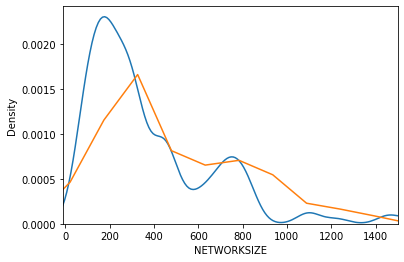

In [ ]:
df_chico = df[df['cEXT'] == 'n']

sns.kdeplot(df[df['cEXT'] == 'n']['NETWORKSIZE'])
sns.kdeplot(df[df['cEXT'] == 'y']['NETWORKSIZE'])
plt.xlim(-10, 1500);

¿Podemos concluir que los grupos son diferentes?

In [ ]:
df.describe()

,sEXT,sNEU,sAGR,sCON,sOPN,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
count,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9.917000e+03,9917.000000,9917.000000,9.917000e+03,9917.000000,9916.000000
mean,3.354760,2.609453,3.616643,3.474201,4.130386,429.377120,1.354253e+05,94.665170,3.154012,1.376425e+05,0.489920,0.128821
std,0.857578,0.760248,0.682485,0.737215,0.585672,428.760382,1.994338e+05,5.506696,311.073343,2.013921e+05,0.011908,0.106063
min,1.330000,1.250000,1.650000,1.450000,2.250000,24.000000,9.325000e+01,0.040000,0.000000,4.900000e-01,0.180000,0.000000
25%,2.710000,2.000000,3.140000,3.000000,3.750000,196.000000,1.690220e+04,93.770000,0.010000,1.798200e+04,0.490000,0.060000
50%,3.400000,2.600000,3.650000,3.400000,4.250000,317.000000,4.716690e+04,96.440000,0.020000,4.868300e+04,0.490000,0.090000
75%,4.000000,3.050000,4.150000,4.000000,4.550000,633.000000,1.966060e+05,97.880000,0.030000,1.981860e+05,0.500000,0.170000
max,5.000000,4.750000,5.000000,5.000000,5.000000,29724.900000,1.251780e+06,99.820000,30978.000000,1.263790e+06,0.500000,0.630000


In [ ]:
df['cOPN'].value_counts()

y    7370
n    2547
Name: cOPN, dtype: int64

In [ ]:
# Recordemos cómo abrir la documentación de un método
df.sort_values?

In [ ]:
# Calculamos el máximo
df.sort_values('NETWORKSIZE', ascending=False).head(1)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
6399,b576dc0449e75306c30456902ce0c80b,To those with interest in international politi...,3.84,2.6,3.75,4.0,4.15,y,n,y,y,y,254,29724.9,93.25,0.04,30978.0,0.49,0.18,NaN


In [ ]:
# Calculamos el mínimo
df.sort_values('NETWORKSIZE').head(1)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
8232,b05f34be807a91ce0325cda601bc5856,"I'm flu free. Anyone wanna do something, cause...",2.9,3.35,2.8,3.0,3.95,n,y,n,n,y,10/04/09 05:41 PM,24.0,225.0,88.93,0.13,241.0,0.48,0.12
